In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/My Drive/perMinuteData.csv'
data = pd.read_csv(path)

In [4]:
data

,timestamp,open,high,low,close,volume
0,3/13/2020 12:04,33.4200,33.460,33.3846,33.4000,50106
1,3/13/2020 12:03,33.5650,33.575,33.4200,33.4200,83611
2,3/13/2020 12:02,33.7000,33.720,33.5500,33.5698,52052
3,3/13/2020 12:01,33.7121,33.800,33.6700,33.7200,69360
4,3/13/2020 12:00,33.7700,33.800,33.6600,33.7200,53063
...,...,...,...,...,...,...
1667,3/9/2020 9:35,36.8900,36.890,36.8900,36.8900,0
1668,3/9/2020 9:34,37.0800,37.080,36.9600,36.9800,174913
1669,3/9/2020 9:33,36.7250,37.170,36.7110,37.0700,263508
1670,3/9/2020 9:32,36.5500,36.740,36.5250,36.7200,130616


In [5]:
data['timestamp']

0       3/13/2020 12:04
1       3/13/2020 12:03
2       3/13/2020 12:02
3       3/13/2020 12:01
4       3/13/2020 12:00
             ...       
1667      3/9/2020 9:35
1668      3/9/2020 9:34
1669      3/9/2020 9:33
1670      3/9/2020 9:32
1671      3/9/2020 9:31
Name: timestamp, Length: 1672, dtype: object

In [6]:
data.dtypes

timestamp     object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object

In [7]:
data['timestamp1'] = pd.to_datetime(data['timestamp'],infer_datetime_format=True)

In [8]:
data = data.drop('timestamp',axis=1)
data

,open,high,low,close,volume,timestamp1
0,33.4200,33.460,33.3846,33.4000,50106,2020-03-13 12:04:00
1,33.5650,33.575,33.4200,33.4200,83611,2020-03-13 12:03:00
2,33.7000,33.720,33.5500,33.5698,52052,2020-03-13 12:02:00
3,33.7121,33.800,33.6700,33.7200,69360,2020-03-13 12:01:00
4,33.7700,33.800,33.6600,33.7200,53063,2020-03-13 12:00:00
...,...,...,...,...,...,...
1667,36.8900,36.890,36.8900,36.8900,0,2020-03-09 09:35:00
1668,37.0800,37.080,36.9600,36.9800,174913,2020-03-09 09:34:00
1669,36.7250,37.170,36.7110,37.0700,263508,2020-03-09 09:33:00
1670,36.5500,36.740,36.5250,36.7200,130616,2020-03-09 09:32:00


In [9]:
data['timestamp1']

0      2020-03-13 12:04:00
1      2020-03-13 12:03:00
2      2020-03-13 12:02:00
3      2020-03-13 12:01:00
4      2020-03-13 12:00:00
               ...        
1667   2020-03-09 09:35:00
1668   2020-03-09 09:34:00
1669   2020-03-09 09:33:00
1670   2020-03-09 09:32:00
1671   2020-03-09 09:31:00
Name: timestamp1, Length: 1672, dtype: datetime64[ns]

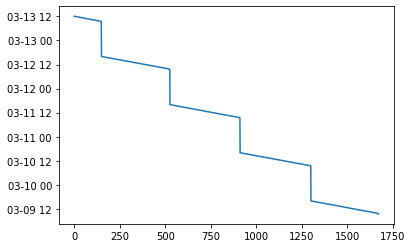

In [10]:
import matplotlib.pyplot as plt

plt.plot(data['timestamp1'])

In [11]:
pip install requests

In [12]:
import urllib               # to access the requests
import json                 # Used to load data into JSON format
url = "https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&outputsize=full&symbol=CSCO&interval=1min&apikey=S5Z0Y3FXULOBW1GN"
response = urllib.request.urlopen(url)
print(response)

In [13]:
text = response.read()

In [14]:
json_data = json.loads(text)

In [15]:
dd = pd.DataFrame(columns=["open","high","low","close","volume","timestamp"])
dd

,open,high,low,close,volume,timestamp


In [16]:
for i in json_data['Time Series (1min)']:
  li = []
  for j in json_data['Time Series (1min)'][i]:
    li.append(float(json_data['Time Series (1min)'][i][j]))
  li.append(i)
  dd = dd.append(pd.Series(li,index = dd.columns),ignore_index=True)

In [17]:
dd['UpdatedTimeStamp'] = pd.to_datetime(dd['timestamp'],infer_datetime_format=True)

In [18]:
dd = dd.drop('timestamp',axis=1)

In [19]:
dd

,open,high,low,close,volume,UpdatedTimeStamp
0,53.2500,53.2500,53.2500,53.2500,199.0,2021-07-12 19:04:00
1,53.2300,53.2500,53.2300,53.2500,500.0,2021-07-12 17:53:00
2,53.2300,53.2300,53.2300,53.2300,103.0,2021-07-12 17:13:00
3,53.2700,53.2700,53.2700,53.2700,330.0,2021-07-12 16:42:00
4,53.2500,53.2500,53.2500,53.2500,100.0,2021-07-12 16:35:00
...,...,...,...,...,...,...
3625,52.5965,52.5965,52.5965,52.5965,290.0,2021-06-30 08:01:00
3626,52.5866,52.5965,52.5866,52.5965,432.0,2021-06-30 07:51:00
3627,52.5667,52.5667,52.5667,52.5667,123.0,2021-06-30 07:48:00
3628,52.5667,52.5667,52.5667,52.5667,210.0,2021-06-30 07:25:00


In [20]:
dd.dtypes

open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
UpdatedTimeStamp    datetime64[ns]
dtype: object

In [21]:
pip install tensorflow==1.14

     |████████████████████████████████| 109.3MB 34kB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 491kB 36.0MB/s 
     |████████████████████████████████| 3.2MB 33.3MB/s 
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.14.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: tensorflow 2.5.0
    Uninstalling tensorflow-2.5.0:
      Successfully uninstalled tensorflow-2.5.0


In [21]:
import tensorflow as tf

In [22]:
y = pd.DataFrame(dd["close"].values,columns=["Close"])

In [23]:
X = dd.drop("close",axis=1)
X

,open,high,low,volume,UpdatedTimeStamp
0,53.2500,53.2500,53.2500,199.0,2021-07-12 19:04:00
1,53.2300,53.2500,53.2300,500.0,2021-07-12 17:53:00
2,53.2300,53.2300,53.2300,103.0,2021-07-12 17:13:00
3,53.2700,53.2700,53.2700,330.0,2021-07-12 16:42:00
4,53.2500,53.2500,53.2500,100.0,2021-07-12 16:35:00
...,...,...,...,...,...
3625,52.5965,52.5965,52.5965,290.0,2021-06-30 08:01:00
3626,52.5866,52.5965,52.5866,432.0,2021-06-30 07:51:00
3627,52.5667,52.5667,52.5667,123.0,2021-06-30 07:48:00
3628,52.5667,52.5667,52.5667,210.0,2021-06-30 07:25:00


In [24]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
X_train

,open,high,low,volume,UpdatedTimeStamp
2697,53.2150,53.2250,53.2100,13558.0,2021-07-02 09:52:00
367,53.7700,53.7800,53.7400,31896.0,2021-07-12 10:07:00
3135,52.9789,53.0335,52.9739,30861.0,2021-07-01 10:17:00
2752,53.2300,53.2300,53.2300,1400.0,2021-07-02 07:56:00
3047,53.0931,53.1179,53.0881,34011.0,2021-07-01 11:45:00
...,...,...,...,...,...
1130,53.3400,53.3600,53.3350,6978.0,2021-07-08 12:27:00
1294,53.1900,53.2300,53.1800,64516.0,2021-07-08 09:43:00
860,53.1700,53.1700,53.1000,1745.0,2021-07-09 08:45:00
3507,52.4376,52.4376,52.4178,21052.0,2021-06-30 11:12:00


In [27]:
X_train = X_train.drop("UpdatedTimeStamp",axis=1)
X_test = X_test.drop("UpdatedTimeStamp",axis=1)

In [28]:
X_train

,open,high,low,volume
2697,53.2150,53.2250,53.2100,13558.0
367,53.7700,53.7800,53.7400,31896.0
3135,52.9789,53.0335,52.9739,30861.0
2752,53.2300,53.2300,53.2300,1400.0
3047,53.0931,53.1179,53.0881,34011.0
...,...,...,...,...
1130,53.3400,53.3600,53.3350,6978.0
1294,53.1900,53.2300,53.1800,64516.0
860,53.1700,53.1700,53.1000,1745.0
3507,52.4376,52.4376,52.4178,21052.0


In [30]:
pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 33kB/s 
     |████████████████████████████████| 3.8MB 22.1MB/s 
     |████████████████████████████████| 512kB 40.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=6de723cf8b6eeb394c69b3efa91b3f59df7b42b27c11b88579100a6e218d9e1d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.13.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: kapre 0.3.5 has requirement tensorflow>=2.0.0, but you'll have tensorflow 1.15.0 which is incompatible.
  Found existing installation: tensorboard 1.14.0
    Uninstalling tensorboard-1.14.0:
      Successfully uninstalled tensorboard-1.14.0
  Found existing installation: tensorflow-estimator 1.14.0
    Uninstalling tensorflow-estimator-1.14.0:
      Successfully uninstalled tensorflow-estimator-1.14.0
  Found existing installati

In [36]:
n_steps=1
n_inputs=4
n_layers = 3
n_neurons = 150
n_outputs=100
learning_rate =0.5
reset_graph()

X1 = tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y1 = tf.placeholder(tf.int32,[None])

basic_cell = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,activation = tf.nn.relu) for layer in range(n_layers)]
multi_layer_cell = tf.contrib.rnn.MultiRNNCell(basic_cell)
outputs,states = tf.nn.dynamic_rnn(multi_layer_cell,X1,dtype=tf.float32)
states_concat = tf.concat(axis=1,values = states)
logits = tf.layers.dense(states_concat,n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,labels=y1)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_ob = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits,y1,1)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
cls_pred = tf.argmax(logits,axis=1,name="Predictions")
init = tf.global_variables_initializer()


In [30]:
def next_batch(num, data, labels):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data.iloc[i] for i in idx]
    labels_shuffle = [labels.iloc[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [32]:
X_test  = X_test.values.reshape(1089,1,4)

In [33]:
y_test = y_test.values.flatten()

In [34]:
arr = np.array([[[46.07,46.22,45.48,375]]]) 

In [44]:
n_epochs = 9
batch_size = 200

sum = 0
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(10):
            X_batch, y_batch = next_batch(batch_size,X_train,y_train)
            y_batch = y_batch.flatten()
            X_batch = X_batch.reshape((-1, n_steps, n_inputs))
            sess.run(training_ob, feed_dict={X1: X_batch, y1: y_batch})
        acc_train = accuracy.eval(feed_dict={X1: X_batch, y1: y_batch})
        acc_test = accuracy.eval(feed_dict={X1: X_test, y1: y_test})
        cls_prediction = sess.run(cls_pred, feed_dict={X1: X_test})
        # print(cls_prediction)
        cls_prediction = sess.run(cls_pred, feed_dict={X1: arr})
        # print(cls_prediction)
        sum+=cls_prediction
        print("Epoch", epoch, "Train accuracy =", acc_train, "Test accuracy =", acc_test)

print("Actual value ",45.63,end="\n")    
print("Predicted value ",sum/n_epochs)

Epoch 0 Train accuracy = 0.38 Test accuracy = 0.3140496
Epoch 1 Train accuracy = 0.3 Test accuracy = 0.3140496
Epoch 2 Train accuracy = 0.725 Test accuracy = 0.6859504
Epoch 3 Train accuracy = 0.69 Test accuracy = 0.6859504
Epoch 4 Train accuracy = 0.685 Test accuracy = 0.6859504
Epoch 5 Train accuracy = 0.68 Test accuracy = 0.6859504
Epoch 6 Train accuracy = 0.63 Test accuracy = 0.6859504
Epoch 7 Train accuracy = 0.67 Test accuracy = 0.6859504
Epoch 8 Train accuracy = 0.645 Test accuracy = 0.6859504
Actual value  45.63
Predicted value  [52.77777778]


In [38]:
mat = tf.confusion_matrix(y_test,cls_pred)

In [39]:
mat

<tf.Tensor 'confusion_matrix/SparseTensorDenseAdd:0' shape=(?, ?) dtype=int32>

In [40]:
arr.shape

(1, 1, 4)

In [41]:
y_arr = X_test[0]
y_arr = y_arr.reshape(1,1,4)